In [13]:
from typing import Tuple
import pandas as pd 
import random 
import seaborn as sns

In [14]:
# wczytuje dane i sprawdzam pierwsze 5
seeds = pd.read_csv('seeds.csv', sep=',')
print(seeds.head())

    Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  15.26      14.84       0.8710          5.763         3.312   
1  14.88      14.57       0.8811          5.554         3.333   
2  14.29      14.09       0.9050          5.291         3.337   
3  13.84      13.94       0.8955          5.324         3.379   
4  16.14      14.99       0.9034          5.658         3.562   

   Asymmetry.Coeff  Kernel.Groove  Type  
0            2.221          5.220     1  
1            1.018          4.956     1  
2            2.699          4.825     1  
3            2.259          4.805     1  
4            1.355          5.175     1  


In [15]:
# sprawdzam describe danych
print(seeds.describe())

             Area   Perimeter  Compactness  Kernel.Length  Kernel.Width  \
count  199.000000  199.000000   199.000000     199.000000    199.000000   
mean    14.918744   14.595829     0.870811       5.643151      3.265533   
std      2.919976    1.310445     0.023320       0.443593      0.378322   
min     10.590000   12.410000     0.808100       4.899000      2.630000   
25%     12.330000   13.470000     0.857100       5.267000      2.954500   
50%     14.430000   14.370000     0.873400       5.541000      3.245000   
75%     17.455000   15.805000     0.886800       6.002000      3.564500   
max     21.180000   17.250000     0.918300       6.675000      4.033000   

       Asymmetry.Coeff  Kernel.Groove        Type  
count       199.000000     199.000000  199.000000  
mean          3.699217       5.420653    1.994975  
std           1.471102       0.492718    0.813382  
min           0.765100       4.519000    1.000000  
25%           2.570000       5.046000    1.000000  
50%         

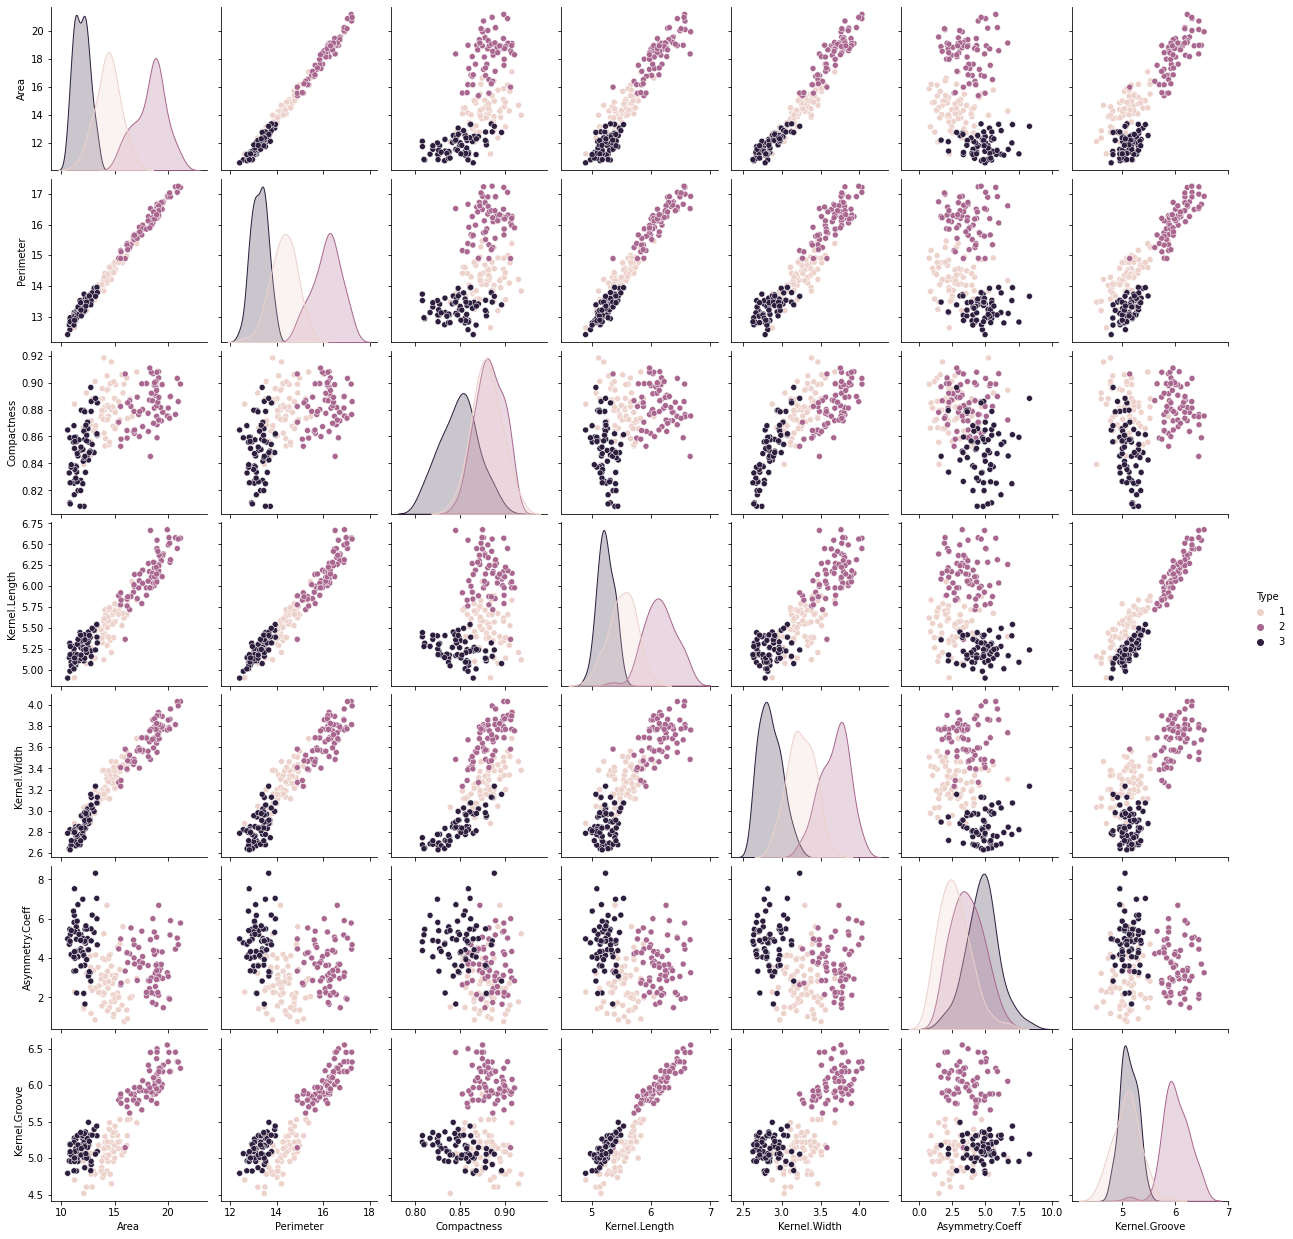

In [16]:
#robię pair plot'a
sns.pairplot(seeds, hue="Type")

<AxesSubplot:xlabel='Type', ylabel='Area'>

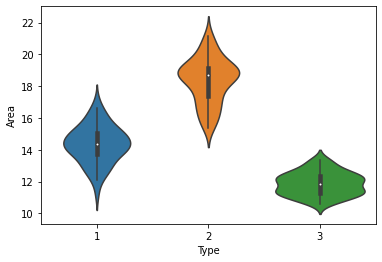

In [21]:
# robię przykładowego violin plota
sns.violinplot(x="Type", y="Area", data=seeds)

In [18]:
class ProcessingData:
    # zwracam dataframe w losowej kolejności i resetuje indeksy
    @staticmethod
    def shuffleDF(df: pd.DataFrame) -> pd.DataFrame:
        return df.iloc[random.sample(range(len(df)), len(df))].reset_index(drop=True)

    # normalizuje każdą kolumnę w dataframe (według przekazanej listy) metodą min max
    @staticmethod
    def normalizeDF(df: pd.DataFrame, columnNames: list) -> pd.DataFrame:
        for columnName in columnNames:
            df[columnName] = (df[columnName]-df[columnName].min())/(df[columnName].max()-df[columnName].min())
        return df

    # zwracam wiersze gdzie index jest mniejszy od długość df*wielkość df i wiersze gdzie index jest równy lub większy od długość *wielkość df 
    @staticmethod
    def splitDF(df: pd.DataFrame, trainSize: float) -> Tuple[pd.DataFrame, pd.DataFrame]:
        return df[df.index < int(len(df)*trainSize)], df[df.index >= int(len(df)*trainSize)]

    # wykonuje wszystkie powyższe metody i zwracam zestaw treningowy i testowy
    @staticmethod
    def processData(df: pd.DataFrame, columnNames: list, trainSize: float) -> Tuple[pd.DataFrame, pd.DataFrame]:
        df = ProcessingData.shuffleDF(df)
        df = ProcessingData.normalizeDF(df, columnNames)
        return ProcessingData.splitDF(df, trainSize)
    



In [19]:
# wczytuje dane i je przerabiam
X_train, X_test = ProcessingData.processData(seeds, seeds.columns[:-1], 0.8)
print(len(X_train), len(X_test))
print(X_test.head())
print(X_train.head())

159 40
         Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
159  0.440982   0.502066     0.570780       0.486486      0.486101   
160  0.120869   0.126033     0.647913       0.131194      0.230221   
161  0.151086   0.163223     0.637024       0.134009      0.250178   
162  0.337110   0.411157     0.456443       0.427365      0.355666   
163  0.742210   0.766529     0.762250       0.680180      0.811832   

     Asymmetry.Coeff  Kernel.Groove  Type  
159         0.192837       0.345150     1  
160         0.375091       0.301822     3  
161         0.379594       0.172821     3  
162         0.305554       0.323486     1  
163         0.194691       0.627770     2  
       Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0  0.807365   0.867769     0.581670       0.765766      0.789024   
1  0.140699   0.169421     0.529038       0.112613      0.218104   
2  0.207743   0.231405     0.639746       0.182995      0.302210   
3  0.216242   0.225207     0.724138 